In [1]:
import pandas as pd

In [4]:
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("data-export (1).csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [36]:
df.columns = [
    'ChannelGroup', 'DateHours', 'Users', 'Sessions', 'EngagedSessions',
    'AvgEngagementTime', 'EngagedSessionsPerUser', 'EventsPerSession', 'EngagementRate', 'EventCount'
]
df.head()

,ChannelGroup,DateHours,Users,Sessions,EngagedSessions,AvgEngagementTime,EngagedSessionsPerUser,EventsPerSession,EngagementRate,EventCount
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [37]:
df=df.drop(index=0).reset_index(drop=True)

In [38]:
df.head()

,ChannelGroup,DateHours,Users,Sessions,EngagedSessions,AvgEngagementTime,EngagedSessionsPerUser,EventsPerSession,EngagementRate,EventCount
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [39]:
df['DateHours'] = pd.to_datetime(df['DateHours'], format='%Y%m%d%H', errors='coerce')
df.head()

,ChannelGroup,DateHours,Users,Sessions,EngagedSessions,AvgEngagementTime,EngagedSessionsPerUser,EventsPerSession,EngagementRate,EventCount
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ChannelGroup            3182 non-null   object        
 1   DateHours               3182 non-null   datetime64[ns]
 2   Users                   3182 non-null   object        
 3   Sessions                3182 non-null   object        
 4   EngagedSessions         3182 non-null   object        
 5   AvgEngagementTime       3182 non-null   object        
 6   EngagedSessionsPerUser  3182 non-null   object        
 7   EventsPerSession        3182 non-null   object        
 8   EngagementRate          3182 non-null   object        
 9   EventCount              3182 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 248.7+ KB


In [41]:
cols_to_convert=df.columns[2:]
df[cols_to_convert]=df[cols_to_convert].apply(pd.to_numeric,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ChannelGroup            3182 non-null   object        
 1   DateHours               3182 non-null   datetime64[ns]
 2   Users                   3182 non-null   int64         
 3   Sessions                3182 non-null   int64         
 4   EngagedSessions         3182 non-null   int64         
 5   AvgEngagementTime       3182 non-null   float64       
 6   EngagedSessionsPerUser  3182 non-null   float64       
 7   EventsPerSession        3182 non-null   float64       
 8   EngagementRate          3182 non-null   float64       
 9   EventCount              3182 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 248.7+ KB


In [43]:
df['Hour']=df['DateHours'].dt.hour
df.head()

,ChannelGroup,DateHours,Users,Sessions,EngagedSessions,AvgEngagementTime,EngagedSessionsPerUser,EventsPerSession,EngagementRate,EventCount,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [44]:
df.describe()

,DateHours,Users,Sessions,EngagedSessions,AvgEngagementTime,EngagedSessionsPerUser,EventsPerSession,EngagementRate,EventCount,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


#  Session and user over time

In [47]:
sb.set(style='whitegrid')

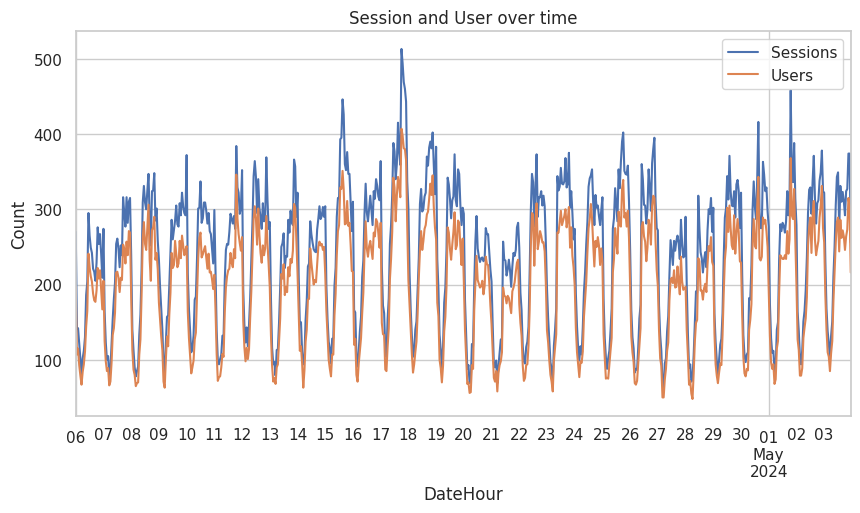

In [76]:
plt.figure(figsize=(10,5))
df.groupby("DateHours")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Session and User over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

# total user by channel

/tmp/ipykernel_26310/558433948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df,x='ChannelGroup',y='Users',estimator=np.sum, palette="viridis")


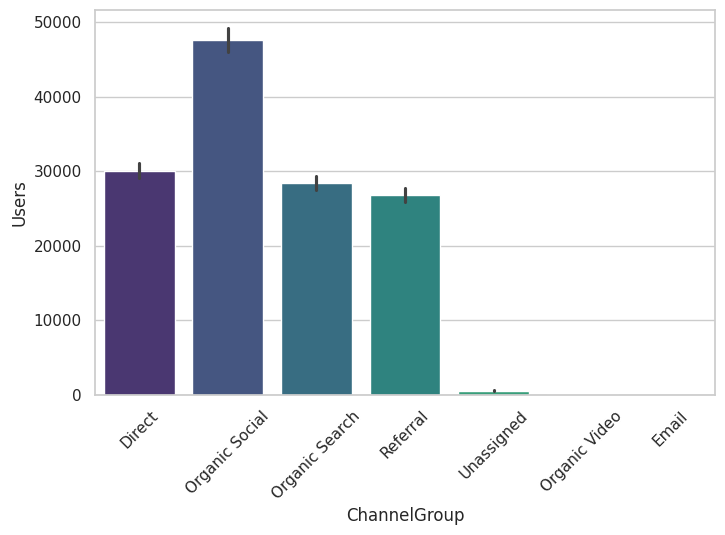

In [78]:
plt.figure(figsize=(8,5))
sb.barplot(data=df,x='ChannelGroup',y='Users',estimator=np.sum, palette="viridis")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_26310/3462153449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df,x='ChannelGroup',y='AvgEngagementTime',estimator=np.mean,palette='magma')


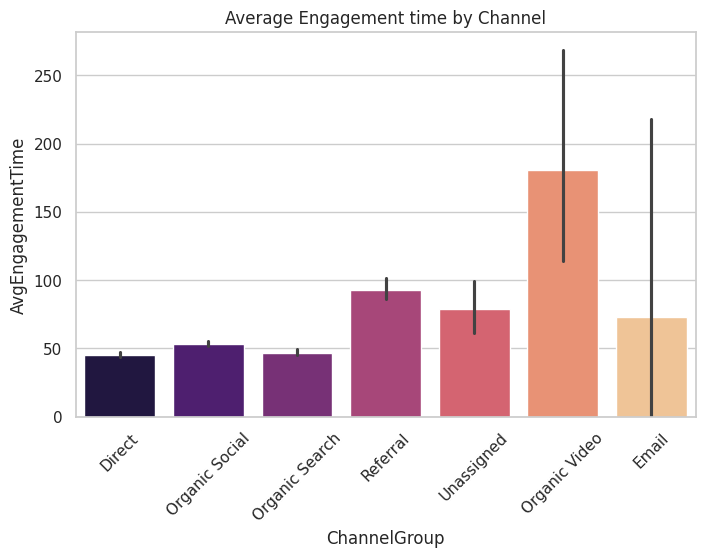

In [80]:
plt.figure(figsize=(8,5))
plt.title("Average Engagement time by Channel")
sb.barplot(data=df,x='ChannelGroup',y='AvgEngagementTime',estimator=np.mean,palette='magma')
plt.xticks(rotation=45)
plt.show()

# Engagement Rate Distribution By Channel

/tmp/ipykernel_26310/3936233332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=df, x='ChannelGroup',y='EngagementRate',palette='coolwarm')


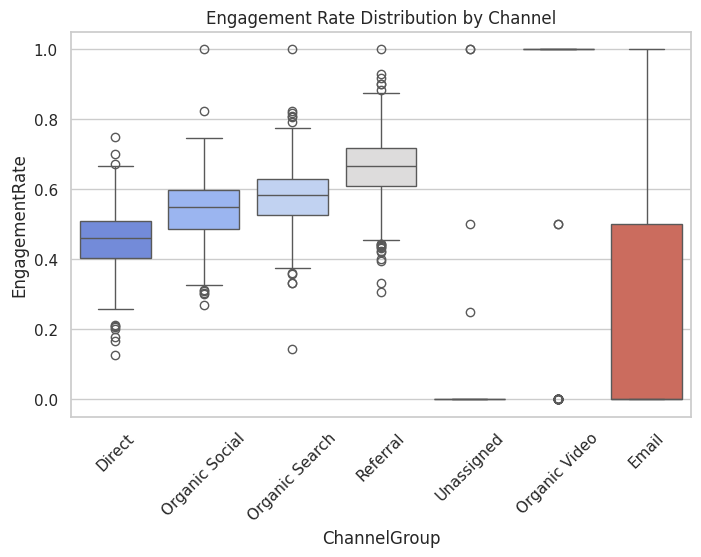

In [82]:
plt.figure(figsize=(8,5))
sb.boxplot(data=df, x='ChannelGroup',y='EngagementRate',palette='coolwarm')
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

# Engaged vs Non Engaged Sessions

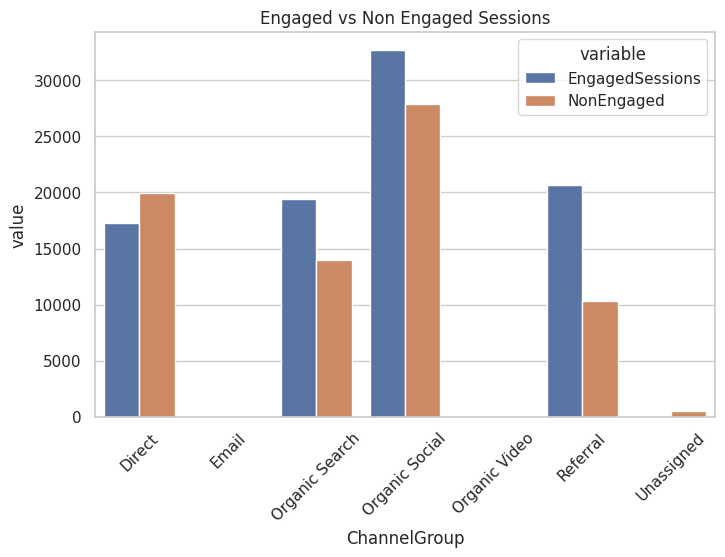

In [88]:
session_df=df.groupby("ChannelGroup")[["Sessions","EngagedSessions"]].sum().reset_index()
session_df["NonEngaged"]= session_df["Sessions"]- session_df["EngagedSessions"]
session_df_melted=session_df.melt(id_vars="ChannelGroup", value_vars=["EngagedSessions","NonEngaged"])
plt.figure(figsize=(8,5))
sb.barplot(data=session_df_melted,x="ChannelGroup",y="value",hue="variable")
plt.title("Engaged vs Non Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# Traffic by hour and channel

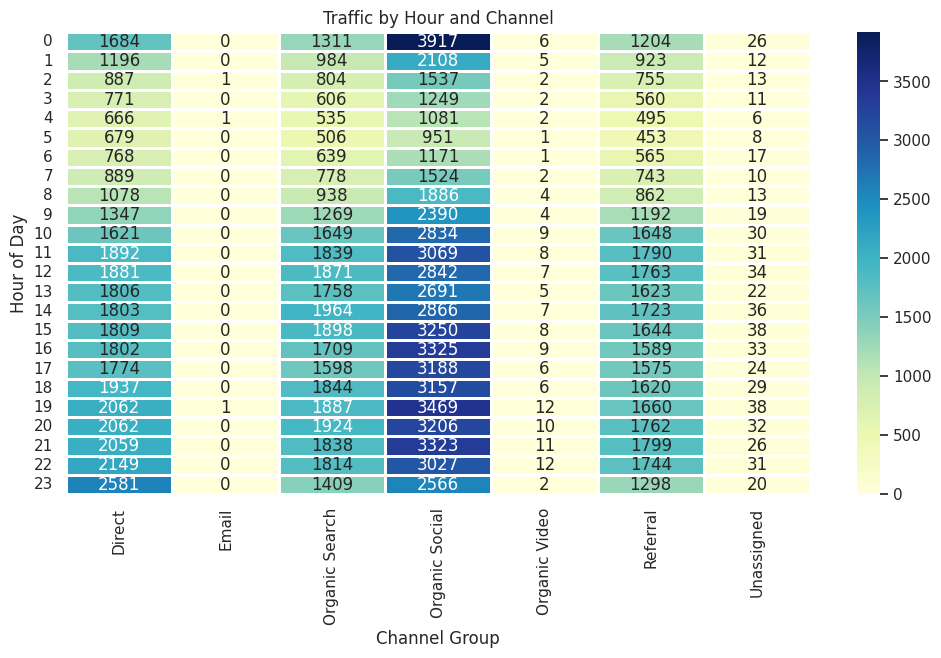

In [91]:
heatmap_data = df.groupby(["Hour", "ChannelGroup"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sb.heatmap(heatmap_data, cmap="YlGnBu", linewidths=1, annot=True, fmt='.0f')

plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

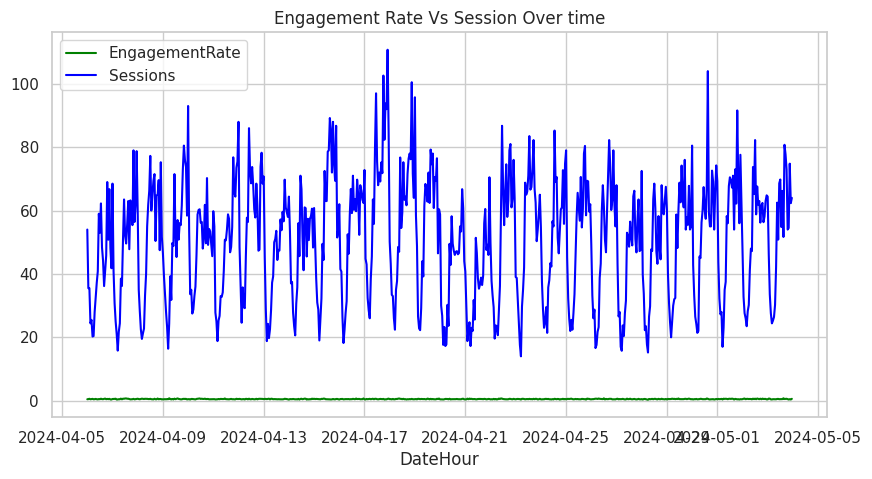

In [96]:
df_plot = df.groupby("DateHours")[["EngagementRate","Sessions"]].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHours"],df_plot["EngagementRate"],label="EngagementRate",color="Green")
plt.plot(df_plot["DateHours"],df_plot["Sessions"],label="Sessions",color="blue")
plt.title("Engagement Rate Vs Session Over time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()